In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv("players_22.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  19239 non-null  object 
 1   Age                   19239 non-null  int64  
 2   Height_cm             19239 non-null  int64  
 3   Weight_kg             19239 non-null  int64  
 4   Preferred_foot        19239 non-null  object 
 5   Best_Position         19239 non-null  object 
 6   Acceleration          19239 non-null  int64  
 7   Aggression            19239 non-null  int64  
 8   Agility               19239 non-null  int64  
 9   Balance               19239 non-null  int64  
 10  Ball_Control          19239 non-null  int64  
 11  Composure             19239 non-null  int64  
 12  Crossing              19239 non-null  int64  
 13  Curve                 19239 non-null  int64  
 14  Defensive_Awareness   19239 non-null  int64  
 15  Dribbling          

In [3]:
# Data Preprocessing
# Drop unnecessary columns (e.g., Name, Age, Goalkeeper attributes)
data.drop(columns=['Name', 'Age', 'GK_Diving', 'GK_Handling', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes','GK_Speed','Dribbling_Reflexes','Defending_Pace','Physical_Positioning','Pace_Diving','Passing_Kicking','Shooting_Handling'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Height_cm            19239 non-null  int64 
 1   Weight_kg            19239 non-null  int64 
 2   Preferred_foot       19239 non-null  object
 3   Best_Position        19239 non-null  object
 4   Acceleration         19239 non-null  int64 
 5   Aggression           19239 non-null  int64 
 6   Agility              19239 non-null  int64 
 7   Balance              19239 non-null  int64 
 8   Ball_Control         19239 non-null  int64 
 9   Composure            19239 non-null  int64 
 10  Crossing             19239 non-null  int64 
 11  Curve                19239 non-null  int64 
 12  Defensive_Awareness  19239 non-null  int64 
 13  Dribbling            19239 non-null  int64 
 14  Finishing            19239 non-null  int64 
 15  Free_Kick_Accuracy   19239 non-null  int64 
 16  Head

In [4]:
# Remove Goalkeeper positions from the target variable
data = data[data['Best_Position'] != 'GK']
data

,Height_cm,Weight_kg,Preferred_foot,Best_Position,Acceleration,Aggression,Agility,Balance,Ball_Control,Composure,...,Sprint_Speed,Stamina,Standing_Tackle,Strength,Vision,Volleys,Weak_Foot,Attacking_Work_Rate,Defensive_Work_Rate,Body_Type
0,170,72,Left,RW,91,44,91,95,96,96,...,80,72,35,69,95,88,4,Medium,Low,Unique
1,185,81,Right,ST,77,81,77,82,88,88,...,79,76,42,86,81,89,4,High,Medium,Unique
2,187,83,Right,ST,85,63,86,74,88,95,...,88,77,32,77,76,86,4,High,Low,Unique
3,175,68,Right,LW,93,63,96,84,95,93,...,89,81,32,53,90,86,5,High,Medium,Unique
4,181,70,Right,CM,76,76,79,78,91,89,...,76,89,65,74,94,82,5,High,High,Unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,180,64,Right,CDM,56,52,55,70,49,37,...,60,51,43,46,43,30,3,Medium,Medium,Lean (170-185)
19235,175,70,Right,CM,60,49,64,69,42,47,...,58,63,44,47,49,32,3,Medium,Medium,Lean (170-185)
19236,178,72,Right,CM,60,51,58,59,49,36,...,60,56,44,50,46,37,3,Medium,Medium,Lean (170-185)
19237,173,66,Right,ST,69,34,72,73,45,47,...,67,50,14,40,40,34,3,Medium,Medium,Lean (170-185)


In [5]:
# Separate target variable and feature set
X = data.drop('Best_Position', axis=1)
y = data['Best_Position']

In [6]:
X

,Height_cm,Weight_kg,Preferred_foot,Acceleration,Aggression,Agility,Balance,Ball_Control,Composure,Crossing,...,Sprint_Speed,Stamina,Standing_Tackle,Strength,Vision,Volleys,Weak_Foot,Attacking_Work_Rate,Defensive_Work_Rate,Body_Type
0,170,72,Left,91,44,91,95,96,96,85,...,80,72,35,69,95,88,4,Medium,Low,Unique
1,185,81,Right,77,81,77,82,88,88,71,...,79,76,42,86,81,89,4,High,Medium,Unique
2,187,83,Right,85,63,86,74,88,95,87,...,88,77,32,77,76,86,4,High,Low,Unique
3,175,68,Right,93,63,96,84,95,93,85,...,89,81,32,53,90,86,5,High,Medium,Unique
4,181,70,Right,76,76,79,78,91,89,94,...,76,89,65,74,94,82,5,High,High,Unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,180,64,Right,56,52,55,70,49,37,46,...,60,51,43,46,43,30,3,Medium,Medium,Lean (170-185)
19235,175,70,Right,60,49,64,69,42,47,54,...,58,63,44,47,49,32,3,Medium,Medium,Lean (170-185)
19236,178,72,Right,60,51,58,59,49,36,39,...,60,56,44,50,46,37,3,Medium,Medium,Lean (170-185)
19237,173,66,Right,69,34,72,73,45,47,29,...,67,50,14,40,40,34,3,Medium,Medium,Lean (170-185)


In [7]:
y

0         RW
1         ST
2         ST
3         LW
4         CM
        ... 
19234    CDM
19235     CM
19236     CM
19237     ST
19238    CAM
Name: Best_Position, Length: 17107, dtype: object

In [8]:
# One-Hot Encoding and Label Encoding
# Encode categorical features with OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X.select_dtypes(include=['object'])))
X_encoded.columns = onehot_encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X = X.drop(columns=X.select_dtypes(include=['object']).columns).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

# Encode the target variable with LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Make Predictions
y_pred = dt_model.predict(X_test)

In [12]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")

# Get the original class labels for each encoded value
original_classes = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
class_mapping = dict(zip(range(len(original_classes)), original_classes))

report = classification_report(y_test, y_pred, target_names=original_classes)
print("\nClassification Report with Original Class Names:")
print(report)


Decision Tree Model Accuracy: 0.5456

Classification Report with Original Class Names:
              precision    recall  f1-score   support

         CAM       0.33      0.32      0.32       238
          CB       0.84      0.84      0.84       652
         CDM       0.42      0.48      0.45       309
          CF       0.03      0.04      0.03        27
          CM       0.57      0.55      0.56       440
          LB       0.64      0.61      0.62       279
          LM       0.24      0.25      0.25       227
          LW       0.15      0.19      0.17        91
         LWB       0.02      0.03      0.02        34
          RB       0.62      0.55      0.58       275
          RM       0.24      0.26      0.25       195
          RW       0.10      0.08      0.09       110
         RWB       0.09      0.07      0.08        43
          ST       0.82      0.79      0.81       502

    accuracy                           0.55      3422
   macro avg       0.36      0.36      0.36    

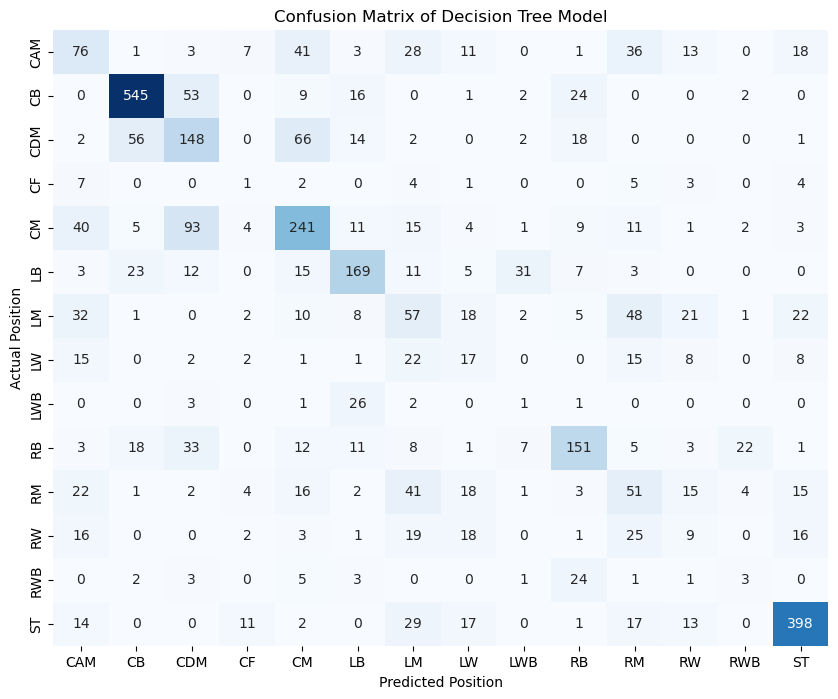

In [13]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of Decision Tree Model")
plt.xlabel("Predicted Position")
plt.ylabel("Actual Position")
plt.show()